In [5]:
# Import libries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import lightgbm as lgb
from scipy import stats
from matplotlib.gridspec import GridSpec
from collections import Counter
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification




In [6]:
# Import dataframes AND Specify a custom delimiter for the CSV input (sep=' ')

red_df=pd.read_csv(r'C:\Users\jspad\Documents\Code Academy\Data Bases\winequality-red.csv', sep=';')
white_df=pd.read_csv(r'C:\Users\jspad\Documents\Code Academy\Data Bases\winequality-white.csv',sep=';')

In [7]:
# Checking null values

red_df.isnull().sum()
white_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
red_df.head(15)
white_df.sort_values(['quality'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3307,9.4,0.24,0.29,8.5,0.037,124.0,208.0,0.99395,2.90,0.38,11.0,3
445,7.1,0.32,0.32,11.0,0.038,16.0,66.0,0.99370,3.24,0.40,11.5,3
2050,11.8,0.23,0.38,11.1,0.034,15.0,123.0,0.99970,2.93,0.55,9.7,3
3810,6.8,0.26,0.34,15.1,0.060,42.0,162.0,0.99705,3.24,0.52,10.5,3
3409,6.2,0.23,0.35,0.7,0.051,24.0,111.0,0.99160,3.37,0.43,11.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
774,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
827,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
876,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
820,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9


In [9]:
#creating new column

red_df['quality_label']= red_df['quality'].apply(lambda value: 'low' 
if value <= 5 else 'medium'
if value <=6 else 'high')

white_df['quality_label']= white_df['quality'].apply(lambda value: 'low' 
if value <= 5 else 'medium'
if value <=6 else 'high')



In [10]:
# transforming these labels into categrical data type

red_df['quality_label'] = pd.Categorical(red_df['quality_label'],
categories=['low', 'medium', 'high'])

white_df['quality_label'] = pd.Categorical(white_df['quality_label'],
categories=['low', 'medium', 'high'])

In [11]:
# Combine the two datasets into wines.

red_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

wines = pd.concat([red_df, white_df])

In [12]:
# Re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=43).reset_index(drop=True)

wines


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,6.9,0.30,0.36,4.50,0.054,31.0,203.0,0.99513,3.40,0.57,10.4,4,low,white
1,9.0,0.40,0.43,2.40,0.068,29.0,46.0,0.99430,3.20,0.60,12.2,6,medium,red
2,7.6,0.17,0.45,11.20,0.054,56.0,137.0,0.99700,3.15,0.47,10.0,5,low,white
3,6.6,0.29,0.39,6.75,0.031,22.0,98.0,0.99130,3.15,0.80,12.9,7,high,white
4,6.1,0.28,0.22,1.80,0.034,32.0,116.0,0.98980,3.36,0.44,12.6,6,medium,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,5.0,0.33,0.18,4.60,0.032,40.0,124.0,0.99114,3.18,0.40,11.0,6,medium,white
6493,6.4,0.24,0.31,2.80,0.038,41.0,114.0,0.99155,3.37,0.66,11.7,7,high,white
6494,5.6,0.25,0.26,3.60,0.037,18.0,115.0,0.99040,3.42,0.50,12.6,6,medium,white
6495,7.4,0.35,0.31,17.95,0.062,42.0,187.0,1.00020,3.27,0.64,9.1,5,low,white


In [13]:
comparative_df= pd.concat([red_df.describe(), white_df.describe()], axis='columns', keys=['Red Wine', 'White Wine'])

comparative_df.head()

Red Wine                                                            \
      fixed acidity volatile acidity  citric acid residual sugar    chlorides   
count   1599.000000      1599.000000  1599.000000    1599.000000  1599.000000   
mean       8.319637         0.527821     0.270976       2.538806     0.087467   
std        1.741096         0.179060     0.194801       1.409928     0.047065   
min        4.600000         0.120000     0.000000       0.900000     0.012000   
25%        7.100000         0.390000     0.090000       1.900000     0.070000   

                                                                          \
      free sulfur dioxide total sulfur dioxide      density           pH   
count         1599.000000          1599.000000  1599.000000  1599.000000   
mean            15.874922            46.467792     0.996747     3.311113   
std             10.460157            32.895324     0.001887     0.154386   
min              1.000000             6.000000     0.990070     2.740000   
25%              7.000000            22.000000     0.995600     3.210000   

                    ...   White Wine                              \
         sulphates  ...  citric acid residual sugar    chlorides   
count  1599.000000  ...  4898.000000    4898.000000  4898.000000   
mean      0.658149  ...     0.334192       6.391415     0.045772   
std       0.169507  ...     0.121020       5.072058     0.021848   
min       0.330000  ...     0.000000       0.600000     0.009000   
25%       0.550000  ...     0.270000       1.700000     0.036000   

                                                                          \
      free sulfur dioxide total sulfur dioxide      density           pH   
count         4898.000000          4898.000000  4898.000000  4898.000000   
mean            35.308085           138.360657     0.994027     3.188267   
std             17.007137            42.498065     0.002991     0.151001   
min              2.000000             9.000000     0.987110     2.720000   
25%             23.000000           108.000000     0.991723     3.090000   

                                              
         sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  
mean      0.489847    10.514267     5.877909  
std       0.114126     1.230621     0.885639  
min       0.220000     8.000000     3.000000  
25%       0.410000     9.500000     5.000000  

[5 rows x 24 columns]

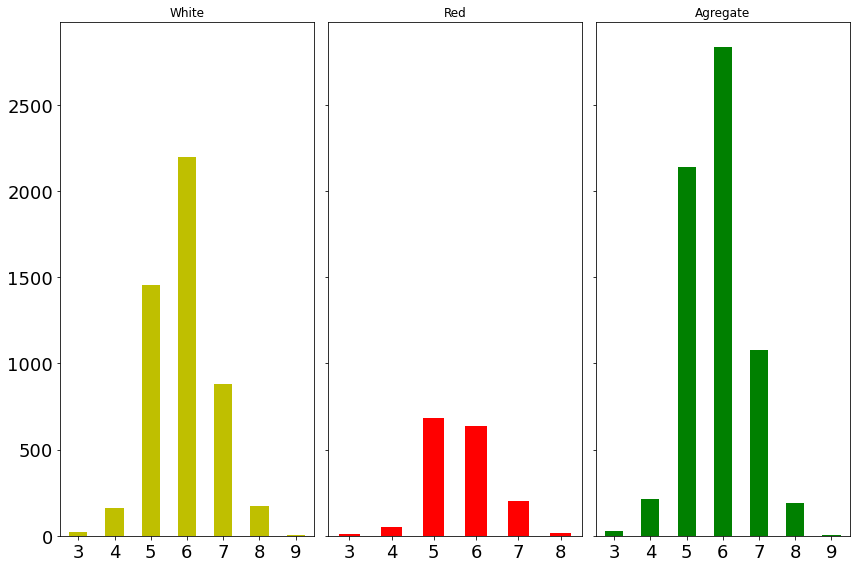

In [14]:
# Vinho Verde Quality Class Distribution

quality_sort=pd.Categorical([3,4,5,6,7,8,9], ordered=True)

figure, axes = plt.subplots(1, 3, figsize=(12, 8), sharey=True)
plt.subplots_adjust(hspace=.0)
q=pd.DataFrame(data=(wines['quality'].value_counts().sort_index(level=quality_sort)))
qred=pd.DataFrame(data=(red_df['quality'].value_counts().sort_index(level=quality_sort)))
qwhite=pd.DataFrame(data=(white_df['quality'].value_counts().sort_index(level=quality_sort)))

qred.plot(ax=axes[1], kind='bar', rot=0, fontsize=18, legend=None, color='r'); axes[1].set_title('Red')
qwhite.plot(ax=axes[0], kind='bar', rot=0, fontsize=18, legend=None, color='y'); axes[0].set_title('White')
q.plot(ax=axes[2], y="quality", kind="bar", rot=0, fontsize=18, legend=None, color='g').set_title('Agregate');

#figure.suptitle('Vinho Verde Quality Class Distribution');
plt.tight_layout()

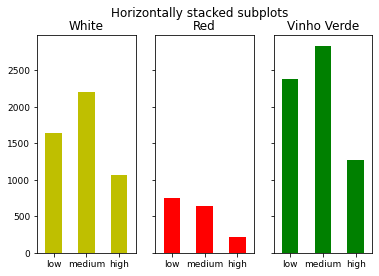

In [15]:
# Plot to show the distribution of qualities

label_sort=pd.Categorical(['low', 'medium', 'high'], ordered=True)

qred=pd.DataFrame(data=(red_df['quality_label'].value_counts().sort_index(level=label_sort)))
qwhite=pd.DataFrame(data=(white_df['quality_label'].value_counts().sort_index(level=label_sort)))
quality=pd.DataFrame(data=(wines['quality_label'].value_counts().sort_index(level=label_sort)))

figure, axes = plt.subplots(1, 3, sharey=True)
plt.subplots_adjust(hspace=.0)
qwhite.plot(ax=axes[0], kind='bar', rot=0, fontsize=9, legend=None, color='y'); axes[0].set_title('White')
qred.plot(ax=axes[1], kind='bar', rot=0, fontsize=9, legend=None, color='r'); axes[1].set_title('Red')
quality.plot(ax=axes[2], y="quality_label", kind="bar", rot=0, fontsize=9, legend=None, color='g').set_title('Vinho Verde');
figure.suptitle('Horizontally stacked subplots');

In [16]:
# Alcohol level vary significantly among the low quality, medium quality and high quality wines?

F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['alcohol'],
wines[wines['quality_label'] == 'medium']['alcohol'],
wines[wines['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 936.9233871275493 	p-value: 0.0


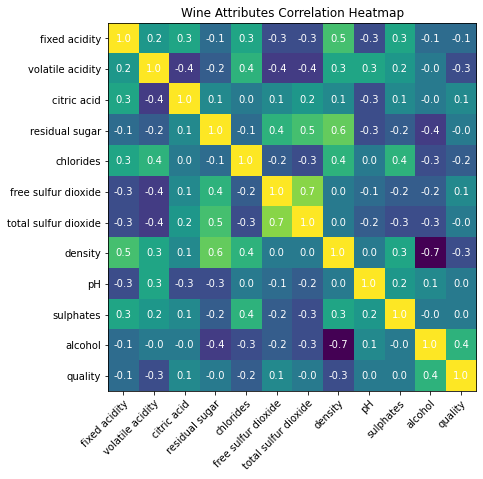

In [17]:
# Wine Attributes Correlation Heatmap

wines_colums = ["fixed acidity", "volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
wines_corr = np.around(wines.corr(method='pearson', min_periods=1).to_numpy(), decimals=1)

fig, ax = plt.subplots()
im = ax.imshow(wines_corr)

# We want to show all ticks...
ax.set_xticks(np.arange(len(wines_colums)))
ax.set_yticks(np.arange(len(wines_colums)))
# # ... and label them with the respective list entries
ax.set_xticklabels(wines_colums)
ax.set_yticklabels(wines_colums)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(wines_colums)):
    for j in range(len(wines_colums)):
        text = ax.text(j, i, wines_corr[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Wine Attributes Correlation Heatmap")
fig.tight_layout()
fig.set_figheight(100)
plt.show()


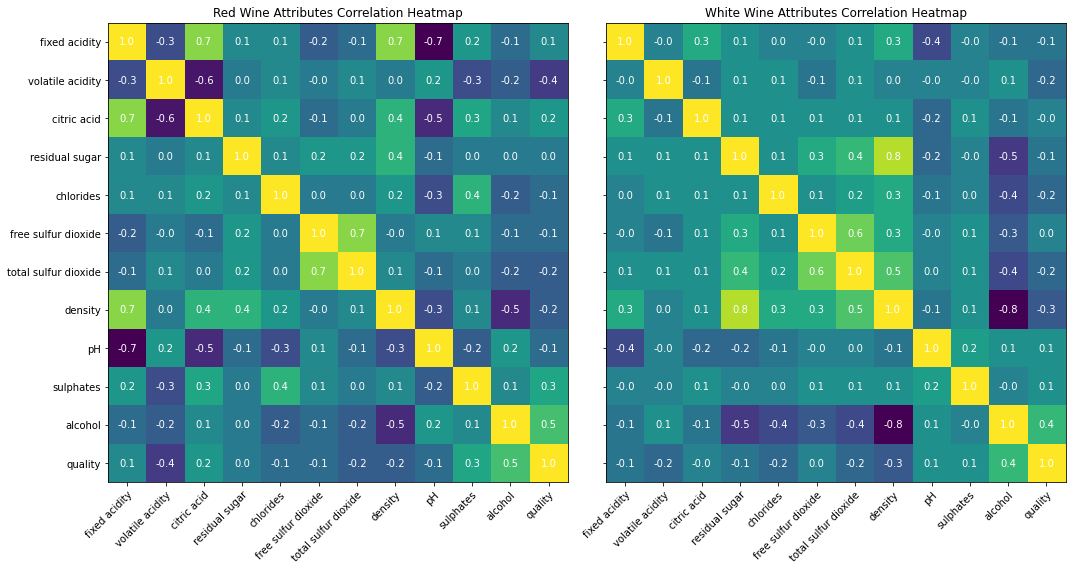

In [18]:
# Comparative Attributes Correlation Heatmap - Red/White
 
wines_colums = ["fixed acidity", "volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
red_corr = np.around(red_df.corr(method='pearson', min_periods=1).to_numpy(), decimals=1)
white_corr = np.around(white_df.corr(method='pearson', min_periods=1).to_numpy(), decimals=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

im1 = ax1.imshow(red_corr)
ax1.set_xticks(np.arange(len(wines_colums)))
ax1.set_yticks(np.arange(len(wines_colums)))
ax1.set_xticklabels(wines_colums)
ax1.set_yticklabels(wines_colums)
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(len(wines_colums)):
    for j in range(len(wines_colums)):
        text = ax1.text(j, i, red_corr[i, j],
                       ha="center", va="center", color="w")
ax1.set_title("Red Wine Attributes Correlation Heatmap")

im2 = ax2.imshow(white_corr)
ax2.set_xticks(np.arange(len(wines_colums)))
ax2.set_yticks(np.arange(len(wines_colums)))
ax2.set_xticklabels(wines_colums)
ax2.set_yticklabels(wines_colums)
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(len(wines_colums)):
    for j in range(len(wines_colums)):
        text = ax2.text(j, i, white_corr[i, j],
                       ha="center", va="center", color="w")
ax2.set_title("White Wine Attributes Correlation Heatmap")



fig.tight_layout()
#fig.set_figheight(100)
plt.show()

In [19]:
# ML Model Setup

# Relevant Variables according Data Exploring:
# 1. Residual Sugar
# 2. Density
# 3. Alcohol
# 4. Free SO2

# Models:
# 1. Linear Regretion
# 2. KNN - Nearest Neighbor Algorithms
# 3. Lightgbm Booster

# Treat Data:
# 1. Split data --> Train vs Test
# 2. Scale data: Robust scaler (with outliers)

# ML Application
# 1. Red/White Predition --> R/W
# 2. Label Prediction
# 3. Class Prediction


In [20]:
# 1. Split Data R/W

# from sklearn.model_selection import train_test_split
# from collections import Counter

X = wines.iloc[:, lambda df: [3, 5, 7, 10]]
var_names = X.columns
y = np.array(wines['wine_type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=wines.wine_type)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))


Counter({'white': 3428, 'red': 1119}) Counter({'white': 1470, 'red': 480})
Features: ['residual sugar', 'free sulfur dioxide', 'density', 'alcohol']


In [21]:
# 2. Scale Data

#from sklearn.preprocessing import RobustScaler

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)


In [22]:
# Model: Linear Regretion R/W

#from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)



LogisticRegression()

In [23]:
# Prediction R/W

pred_wines_rw_lr = lr.predict(X_test)
print(pred_wines_rw_lr.shape) #checking the shape of between Target and Test
print(y_test.shape)

(1950,)
(1950,)


In [24]:
# Results R/W Linear Regretion with Calssification Report + Confution Matrix + Cohen-Kappa Score

# from sklearn.metrics import classification_report

print(classification_report(y_test,pred_wines_rw_lr, target_names=['red', 'white']))

print(confusion_matrix(y_test,pred_wines_rw_lr))

print("Percentage of accurancy of the model with Cohen-Kappa score is: ", (cohen_kappa_score(y_test,pred_wines_rw_lr))*100, "%")




              precision    recall  f1-score   support

         red       0.95      0.93      0.94       480
       white       0.98      0.99      0.98      1470

    accuracy                           0.97      1950
   macro avg       0.96      0.96      0.96      1950
weighted avg       0.97      0.97      0.97      1950

[[ 444   36]
 [  22 1448]]
Percentage of accurancy of the model with Cohen-Kappa score is:  91.90605006655503 %


In [25]:
# Model: Linear Regretion Label

X = wines.iloc[:, lambda df: [3, 5, 7, 10]]
var_names = X.columns
y = np.array(wines['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=wines.quality_label)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)

pred_wines_label_lr= lr.predict(X_test)
print(pred_wines_label_lr.shape) 
print(y_test.shape)


print(classification_report(y_test,pred_wines_label_lr, target_names=['high', 'low', 'medium']))
print(confusion_matrix(y_test,pred_wines_label_lr))
print("Percentage of accurancy of the model with Cohen-Kappa score is: ", (cohen_kappa_score(y_test,pred_wines_label_lr))*100, "%")

Counter({'medium': 1985, 'low': 1668, 'high': 894}) Counter({'medium': 851, 'low': 716, 'high': 383})
Features: ['residual sugar', 'free sulfur dioxide', 'density', 'alcohol']
(1950,)
(1950,)
              precision    recall  f1-score   support

        high       0.56      0.32      0.41       383
         low       0.56      0.59      0.58       716
      medium       0.51      0.58      0.54       851

    accuracy                           0.53      1950
   macro avg       0.54      0.50      0.51      1950
weighted avg       0.54      0.53      0.53      1950

[[122  57 204]
 [ 11 425 280]
 [ 84 271 496]]
Percentage of accurancy of the model with Cohen-Kappa score is:  24.618360872895217 %


In [26]:
# Model: Linear Regretion Class

X = wines.iloc[:, lambda df: [3, 5, 7, 10]]
var_names = X.columns
y = np.array(wines['quality'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=wines.quality)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)

pred_wines_class_lr= lr.predict(X_test)
print(pred_wines_class_lr.shape) 
print(y_test.shape)


print(classification_report(y_test,pred_wines_class_lr, target_names=['3', '4', '5', '6', '7', '8', '9']))
print(confusion_matrix(y_test,pred_wines_class_lr))
print("Percentage of accurancy of the model with Cohen-Kappa score is: ", (cohen_kappa_score(y_test,pred_wines_class_lr))*100, "%")

Counter({6: 1985, 5: 1496, 7: 755, 4: 151, 8: 135, 3: 21, 9: 4}) Counter({6: 851, 5: 642, 7: 324, 4: 65, 8: 58, 3: 9, 9: 1})
Features: ['residual sugar', 'free sulfur dioxide', 'density', 'alcohol']
(1950,)
(1950,)
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        65
           5       0.54      0.59      0.57       642
           6       0.50      0.66      0.57       851
           7       0.43      0.16      0.24       324
           8       0.00      0.00      0.00        58
           9       0.00      0.00      0.00         1

    accuracy                           0.51      1950
   macro avg       0.21      0.20      0.20      1950
weighted avg       0.47      0.51      0.47      1950

[[  0   0   6   3   0   0   0]
 [  0   0  32  32   1   0   0]
 [  0   0 380 256   6   0   0]
 [  0   0 238 564  49   0   0]
 [  0   0  37 234  53   0   0]
 [  0   0   5  38  15   0   0]
 [

C:\Users\jspad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jspad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jspad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [27]:
# Model: KNN R/W

#from sklearn.neighbors import KNeighborsClassifier

X = wines.iloc[:, lambda df: [3, 5, 7, 10]]
var_names = X.columns
y = np.array(wines['wine_type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=wines.wine_type)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

pred_wines_rw_neigh= knn.predict(X_test)

print(pred_wines_rw_neigh.shape)
print(y_test.shape)

print(classification_report(y_test,pred_wines_rw_neigh, target_names=['red', 'white']))
print(confusion_matrix(y_test,pred_wines_rw_neigh))
print("Percentage of accurancy of the model with Cohen-Kappa score is: ", (cohen_kappa_score(y_test,pred_wines_rw_neigh))*100, "%")


Counter({'white': 3428, 'red': 1119}) Counter({'white': 1470, 'red': 480})
Features: ['residual sugar', 'free sulfur dioxide', 'density', 'alcohol']
(1950,)
(1950,)
              precision    recall  f1-score   support

         red       0.95      0.94      0.95       480
       white       0.98      0.98      0.98      1470

    accuracy                           0.97      1950
   macro avg       0.97      0.96      0.96      1950
weighted avg       0.97      0.97      0.97      1950

[[ 453   27]
 [  24 1446]]
Percentage of accurancy of the model with Cohen-Kappa score is:  92.93794337572697 %


In [28]:
# Model: KNN Label

X = wines.iloc[:, lambda df: [3, 5, 7, 10]]
var_names = X.columns
y = np.array(wines['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=wines.quality_label)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

pred_wines_label_neigh= knn.predict(X_test)

print(pred_wines_label_neigh.shape)
print(y_test.shape)

print(classification_report(y_test,pred_wines_label_neigh, target_names=['high', 'low', 'medium']))
print(confusion_matrix(y_test,pred_wines_label_neigh))
print("Percentage of accurancy of the model with Cohen-Kappa score is: ", (cohen_kappa_score(y_test,pred_wines_label_neigh))*100, "%")


Counter({'medium': 1985, 'low': 1668, 'high': 894}) Counter({'medium': 851, 'low': 716, 'high': 383})
Features: ['residual sugar', 'free sulfur dioxide', 'density', 'alcohol']
(1950,)
(1950,)
              precision    recall  f1-score   support

        high       0.47      0.52      0.49       383
         low       0.61      0.59      0.60       716
      medium       0.55      0.54      0.54       851

    accuracy                           0.55      1950
   macro avg       0.54      0.55      0.55      1950
weighted avg       0.56      0.55      0.55      1950

[[199  34 150]
 [ 69 422 225]
 [156 237 458]]
Percentage of accurancy of the model with Cohen-Kappa score is:  30.24951982249141 %


In [29]:
# Model: KNN Class

X = wines.iloc[:, lambda df: [3, 5, 7, 10]]
var_names = X.columns
y = np.array(wines['quality'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=wines.quality)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

pred_wines_class_neigh= knn.predict(X_test)

print(pred_wines_class_neigh.shape)
print(y_test.shape)

print(classification_report(y_test,pred_wines_class_neigh, target_names=['3', '4', '5', '6', '7', '8', '9']))
print(confusion_matrix(y_test,pred_wines_class_neigh))
print("Percentage of accurancy of the model with Cohen-Kappa score is: ", (cohen_kappa_score(y_test,pred_wines_class_neigh))*100, "%")

Counter({6: 1985, 5: 1496, 7: 755, 4: 151, 8: 135, 3: 21, 9: 4}) Counter({6: 851, 5: 642, 7: 324, 4: 65, 8: 58, 3: 9, 9: 1})
Features: ['residual sugar', 'free sulfur dioxide', 'density', 'alcohol']
(1950,)
(1950,)
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.09      0.11      0.10        65
           5       0.55      0.64      0.59       642
           6       0.57      0.57      0.57       851
           7       0.46      0.33      0.39       324
           8       0.22      0.12      0.16        58
           9       0.00      0.00      0.00         1

    accuracy                           0.52      1950
   macro avg       0.27      0.25      0.26      1950
weighted avg       0.51      0.52      0.51      1950

[[  0   2   2   5   0   0   0]
 [  3   7  36  19   0   0   0]
 [  5  25 408 185  19   0   0]
 [  6  28 229 484  93  11   0]
 [  0  12  58 132 108  14   0]
 [  0   0   4  31  16   7   0]
 [

C:\Users\jspad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jspad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jspad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
# Model: Random Forest R/W


# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification

X = wines.iloc[:, lambda df: [3, 5, 7, 10]]
var_names = X.columns
y = np.array(wines['wine_type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.wine_type)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

pred_wines_rw_forest= clf.predict(X_test)

#print(pred_wines_rw_forest)
#print(y_test.count)

print(classification_report(y_test,pred_wines_rw_forest, target_names=['red', 'white']))
print(confusion_matrix(y_test,pred_wines_rw_forest))
print("Percentage of accurancy of the model with Cohen-Kappa score is: ", (cohen_kappa_score(y_test,pred_wines_rw_forest))*100, "%")


Counter({'white': 4408, 'red': 1439}) Counter({'white': 490, 'red': 160})
Features: ['residual sugar', 'free sulfur dioxide', 'density', 'alcohol']
              precision    recall  f1-score   support

         red       0.97      0.94      0.96       160
       white       0.98      0.99      0.99       490

    accuracy                           0.98       650
   macro avg       0.97      0.97      0.97       650
weighted avg       0.98      0.98      0.98       650

[[151   9]
 [  5 485]]
Percentage of accurancy of the model with Cohen-Kappa score is:  94.14715719063545 %


In [44]:
# Model: Random Forest Label

X = wines.iloc[:, lambda df: [3, 5, 7, 10]]
var_names = X.columns
y = np.array(wines['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.quality_label)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)


pred_wines_label_forest= clf.predict(X_test)

print(pred_wines_label_forest.shape)
print(y_test.shape)

print(classification_report(y_test,pred_wines_label_forest, target_names=['high', 'low', 'medium']))
print(confusion_matrix(y_test,pred_wines_label_forest))
print("Percentage of accurancy of the model with Cohen-Kappa score is: ", (cohen_kappa_score(y_test,pred_wines_label_forest))*100, "%")




Counter({'medium': 2552, 'low': 2146, 'high': 1149}) Counter({'medium': 284, 'low': 238, 'high': 128})
Features: ['residual sugar', 'free sulfur dioxide', 'density', 'alcohol']
(650,)
(650,)
              precision    recall  f1-score   support

        high       0.61      0.47      0.53       128
         low       0.65      0.65      0.65       238
      medium       0.59      0.65      0.62       284

    accuracy                           0.61       650
   macro avg       0.62      0.59      0.60       650
weighted avg       0.61      0.61      0.61       650

[[ 60  17  51]
 [  4 155  79]
 [ 35  65 184]]
Percentage of accurancy of the model with Cohen-Kappa score is:  38.25828962406243 %


In [46]:
# Model: Random Forest Class

X = wines.iloc[:, lambda df: [3, 5, 7, 10]]
var_names = X.columns
y = np.array(wines['quality'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=wines.quality)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

pred_wines_class_forest= clf.predict(X_test)

print(pred_wines_class_forest.shape)
print(y_test.shape)

print(classification_report(y_test,pred_wines_class_forest, target_names=['3', '4', '5', '6', '7', '8', '9']))
print(confusion_matrix(y_test,pred_wines_class_forest))
print("Percentage of accurancy of the model with Cohen-Kappa score is: ", (cohen_kappa_score(y_test,pred_wines_class_forest))*100, "%")


Counter({6: 2269, 5: 1710, 7: 863, 4: 173, 8: 154, 3: 24, 9: 4}) Counter({6: 567, 5: 428, 7: 216, 4: 43, 8: 39, 3: 6, 9: 1})
Features: ['residual sugar', 'free sulfur dioxide', 'density', 'alcohol']
(1300,)
(1300,)
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.50      0.14      0.22        43
           5       0.65      0.69      0.67       428
           6       0.60      0.68      0.63       567
           7       0.53      0.42      0.47       216
           8       0.69      0.28      0.40        39
           9       0.00      0.00      0.00         1

    accuracy                           0.60      1300
   macro avg       0.42      0.32      0.34      1300
weighted avg       0.60      0.60      0.59      1300

[[  0   1   3   2   0   0   0]
 [  0   6  17  20   0   0   0]
 [  1   2 296 123   6   0   0]
 [  0   3 120 383  61   0   0]
 [  0   0  21 100  90   5   0]
 [  0   0   1  15  12  11   0]
 [

C:\Users\jspad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jspad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jspad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Counter({'white': 4408, 'red': 1439}) Counter({'white': 490, 'red': 160})
Features: ['residual sugar', 'free sulfur dioxide', 'density', 'alcohol']
[1]	training's binary_logloss: 0.481789	valid_0's binary_logloss: 0.484102
[2]	training's binary_logloss: 0.424648	valid_0's binary_logloss: 0.428418
[3]	training's binary_logloss: 0.379584	valid_0's binary_logloss: 0.384879
[4]	training's binary_logloss: 0.342088	valid_0's binary_logloss: 0.349078
[5]	training's binary_logloss: 0.310161	valid_0's binary_logloss: 0.318354
[6]	training's binary_logloss: 0.28258	valid_0's binary_logloss: 0.292032
[7]	training's binary_logloss: 0.258699	valid_0's binary_logloss: 0.26887
[8]	training's binary_logloss: 0.237511	valid_0's binary_logloss: 0.248196
[9]	training's binary_logloss: 0.218821	valid_0's binary_logloss: 0.229993
[10]	training's binary_logloss: 0.202104	valid_0's binary_logloss: 0.213928
[11]	training's binary_logloss: 0.187164	valid_0's binary_logloss: 0.199356
[12]	training's binary_logl

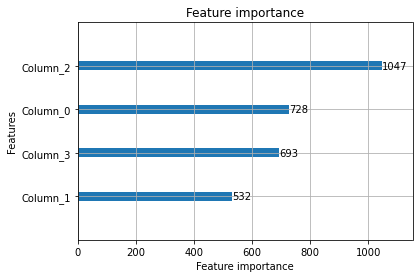

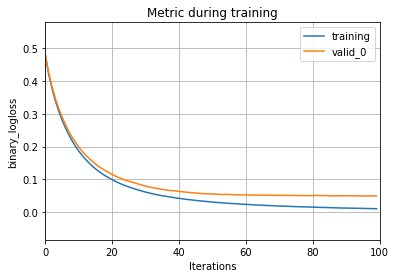

In [55]:
# Model: lightgbm.Booster R/W

# from sklearn import metrics
# import lightgbm as lgb

X = wines.iloc[:, lambda df: [3, 5, 7, 10]]
var_names = X.columns
y = np.array(wines['wine_type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.wine_type)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)


lgbmc = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgbmc.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)])#, verbose=20,eval_metric='logloss')

pred_wines_rw_lgbmc= lgbmc.predict(X_test)

# print(pred_wines_rw_lgbmc.shape)
# print(y_test.shape)

lgb.plot_importance(lgbmc)
lgb.plot_metric(lgbmc)

print(classification_report(y_test,pred_wines_rw_lgbmc, target_names=['red', 'white']))
print(confusion_matrix(y_test,pred_wines_rw_lgbmc))
print("Percentage of accurancy of the model with Cohen-Kappa score is: ", (cohen_kappa_score(y_test,pred_wines_rw_lgbmc))*100, "%")


Counter({'medium': 2552, 'low': 2146, 'high': 1149}) Counter({'medium': 284, 'low': 238, 'high': 128})
Features: ['residual sugar', 'free sulfur dioxide', 'density', 'alcohol']
[1]	training's multi_logloss: 1.01518	valid_0's multi_logloss: 1.01975
[2]	training's multi_logloss: 0.987062	valid_0's multi_logloss: 0.997471
[3]	training's multi_logloss: 0.963234	valid_0's multi_logloss: 0.979031
[4]	training's multi_logloss: 0.94251	valid_0's multi_logloss: 0.962993
[5]	training's multi_logloss: 0.923523	valid_0's multi_logloss: 0.949699
[6]	training's multi_logloss: 0.906723	valid_0's multi_logloss: 0.938447
[7]	training's multi_logloss: 0.892419	valid_0's multi_logloss: 0.929183
[8]	training's multi_logloss: 0.879227	valid_0's multi_logloss: 0.920215
[9]	training's multi_logloss: 0.867909	valid_0's multi_logloss: 0.913544
[10]	training's multi_logloss: 0.857241	valid_0's multi_logloss: 0.9072
[11]	training's multi_logloss: 0.847535	valid_0's multi_logloss: 0.901738
[12]	training's multi_l

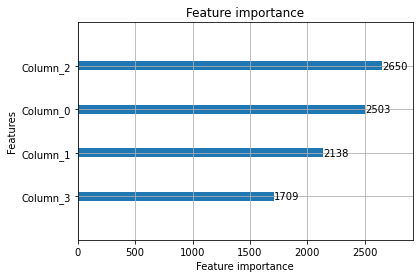

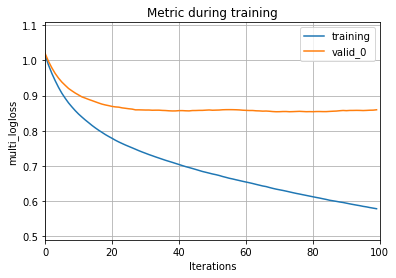

In [56]:
# Model: lightgbm.Booster Label

X = wines.iloc[:, lambda df: [3, 5, 7, 10]]
var_names = X.columns
y = np.array(wines['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.quality_label)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)


lgbmc = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgbmc.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)])#, verbose=20,eval_metric='logloss')

pred_wines_label_lgbmc= lgbmc.predict(X_test)

# print(pred_wines_rw_lgbmc.shape)
# print(y_test.shape)

lgb.plot_importance(lgbmc)
lgb.plot_metric(lgbmc)

print(classification_report(y_test,pred_wines_label_lgbmc, target_names=['high', 'low', 'medium']))
print(confusion_matrix(y_test,pred_wines_label_lgbmc))
print("Percentage of accurancy of the model with Cohen-Kappa score is: ", (cohen_kappa_score(y_test,pred_wines_label_lgbmc))*100, "%")


In [61]:
# Prova viulenza

# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_moons, make_circles, make_classification
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# names = ["Nearest Neighbors","Linear SVM","RBF SVM","Gaussian Process","Decision Tree","Random Forest","Neural Net","AdaBoost","Naive Bayes","QDA",]

# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
# ]

# X = wines.iloc[:, lambda df: [3, 5, 7, 10]]
# var_names = X.columns
# y = np.array(wines['wine_type'])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.wine_type)


# figure = plt.figure(figsize=(27, 9))
# i = 1
# # iterate over datasets
# for ds_cnt, ds in enumerate(wines):
#     # preprocess dataset, split into training and test part
#     rs=RobustScaler()
#     X_train = rs.fit_transform(X_train)
#     X_test = rs.fit_transform(X_test)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.wine_type)
   

#     # x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
#     # y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
#     # xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#     # just plot the dataset first
#     cm = plt.cm.RdBu
#     cm_bright = ListedColormap(["#FF0000", "#0000FF"])
#     ax = plt.subplot(len(wines), len(classifiers) + 1, i)
#     if ds_cnt == 0:
#         ax.set_title("Input data")
#     # Plot the training points
#     ax.scatter(X_train, X_train, c=y_train, cmap=cm_bright, edgecolors="k")
#     # Plot the testing points
#     ax.scatter(
#         X_test, X_test, c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
#     )
#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())
#     ax.set_xticks(())
#     ax.set_yticks(())
#     i += 1

#     # iterate over classifiers
#     for name, clf in zip(names, classifiers):
#         ax = plt.subplot(len(wines), len(classifiers) + 1, i)
#         clf.fit(X_train, y_train)
#         score = clf.score(X_test, y_test)

#         # Plot the decision boundary. For that, we will assign a color to each
#         # point in the mesh [x_min, x_max]x[y_min, y_max].
#         if hasattr(clf, "decision_function"):
#             Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#         else:
#             Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

#         # Put the result into a color plot
#         Z = Z.reshape(xx.shape)
#         ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

#         # Plot the training points
#         ax.scatter(
#             X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
#         )
#         # Plot the testing points
#         ax.scatter(
#             X_test[:, 0],
#             X_test[:, 1],
#             c=y_test,
#             cmap=cm_bright,
#             edgecolors="k",
#             alpha=0.6,
#         )

#         ax.set_xlim(xx.min(), xx.max())
#         ax.set_ylim(yy.min(), yy.max())
#         ax.set_xticks(())
#         ax.set_yticks(())
#         if ds_cnt == 0:
#             ax.set_title(name)
#         ax.text(
#             xx.max() - 0.3,
#             yy.min() + 0.3,
#             ("%.2f" % score).lstrip("0"),
#             size=15,
#             horizontalalignment="right",
#         )
#         i += 1

# plt.tight_layout()
# plt.show()

In [52]:
#pip install lightgbm

In [35]:
#%reset